In [85]:
ls

Untitled.ipynb


In [86]:
import requests
import datetime

In [87]:
tnow = datetime.datetime.now()
tnow

datetime.datetime(2015, 8, 27, 17, 39, 28, 13721)

In [88]:
#Test the api:
r = requests.get('https://api.forecast.io/forecast/ddff5421ea9208aa56645e77155f6aae/37.8267,-122.423')

In [89]:
r.text

u'{"latitude":37.8267,"longitude":-122.423,"timezone":"America/Los_Angeles","offset":-7,"currently":{"time":1440711572,"summary":"Partly Cloudy","icon":"partly-cloudy-day","nearestStormDistance":105,"nearestStormBearing":132,"precipIntensity":0,"precipProbability":0,"temperature":77.19,"apparentTemperature":77.19,"dewPoint":52.85,"humidity":0.43,"windSpeed":11.47,"windBearing":277,"visibility":9.82,"cloudCover":0.28,"pressure":1015.89,"ozone":291.92},"minutely":{"summary":"Partly cloudy for the hour.","icon":"partly-cloudy-day","data":[{"time":1440711540,"precipIntensity":0,"precipProbability":0},{"time":1440711600,"precipIntensity":0,"precipProbability":0},{"time":1440711660,"precipIntensity":0,"precipProbability":0},{"time":1440711720,"precipIntensity":0,"precipProbability":0},{"time":1440711780,"precipIntensity":0,"precipProbability":0},{"time":1440711840,"precipIntensity":0,"precipProbability":0},{"time":1440711900,"precipIntensity":0,"precipProbability":0},{"time":1440711960,"prec

In [90]:
r.json().keys()

[u'hourly',
 u'currently',
 u'longitude',
 u'flags',
 u'daily',
 u'offset',
 u'latitude',
 u'timezone',
 u'minutely']

In [91]:
r.json()["hourly"]

{u'data': [{u'apparentTemperature': 77.14,
   u'cloudCover': 0.34,
   u'dewPoint': 52.3,
   u'humidity': 0.42,
   u'icon': u'partly-cloudy-day',
   u'ozone': 292.76,
   u'precipIntensity': 0,
   u'precipProbability': 0,
   u'pressure': 1016.1,
   u'summary': u'Partly Cloudy',
   u'temperature': 77.14,
   u'time': 1440709200,
   u'visibility': 9.88,
   u'windBearing': 274,
   u'windSpeed': 10.58},
  {u'apparentTemperature': 77.22,
   u'cloudCover': 0.24,
   u'dewPoint': 53.13,
   u'humidity': 0.43,
   u'icon': u'clear-day',
   u'ozone': 291.49,
   u'precipIntensity': 0,
   u'precipProbability': 0,
   u'pressure': 1015.78,
   u'summary': u'Clear',
   u'temperature': 77.22,
   u'time': 1440712800,
   u'visibility': 9.78,
   u'windBearing': 278,
   u'windSpeed': 11.94},
  {u'apparentTemperature': 77.72,
   u'cloudCover': 0.21,
   u'dewPoint': 54.33,
   u'humidity': 0.44,
   u'icon': u'clear-day',
   u'ozone': 289.69,
   u'precipIntensity': 0,
   u'precipProbability': 0,
   u'pressure': 101

In [92]:
r.json()["currently"]

{u'apparentTemperature': 77.19,
 u'cloudCover': 0.28,
 u'dewPoint': 52.85,
 u'humidity': 0.43,
 u'icon': u'partly-cloudy-day',
 u'nearestStormBearing': 132,
 u'nearestStormDistance': 105,
 u'ozone': 291.92,
 u'precipIntensity': 0,
 u'precipProbability': 0,
 u'pressure': 1015.89,
 u'summary': u'Partly Cloudy',
 u'temperature': 77.19,
 u'time': 1440711572,
 u'visibility': 9.82,
 u'windBearing': 277,
 u'windSpeed': 11.47}

In [93]:
#Daily is probably what we want:
r.json()["daily"].keys()

[u'icon', u'data', u'summary']

In [94]:
#And then data:
r.json()["daily"]['data']

[{u'apparentTemperatureMax': 77.72,
  u'apparentTemperatureMaxTime': 1440716400,
  u'apparentTemperatureMin': 61.55,
  u'apparentTemperatureMinTime': 1440684000,
  u'cloudCover': 0.23,
  u'dewPoint': 55.33,
  u'humidity': 0.66,
  u'icon': u'partly-cloudy-night',
  u'moonPhase': 0.42,
  u'ozone': 291.4,
  u'precipIntensity': 0,
  u'precipIntensityMax': 0,
  u'precipProbability': 0,
  u'pressure': 1015.97,
  u'summary': u'Partly cloudy starting in the evening.',
  u'sunriseTime': 1440682608,
  u'sunsetTime': 1440730123,
  u'temperatureMax': 77.72,
  u'temperatureMaxTime': 1440716400,
  u'temperatureMin': 61.55,
  u'temperatureMinTime': 1440684000,
  u'time': 1440658800,
  u'visibility': 9.24,
  u'windBearing': 280,
  u'windSpeed': 7.03},
 {u'apparentTemperatureMax': 78.84,
  u'apparentTemperatureMaxTime': 1440792000,
  u'apparentTemperatureMin': 62.91,
  u'apparentTemperatureMinTime': 1440828000,
  u'cloudCover': 0.58,
  u'dewPoint': 59,
  u'humidity': 0.72,
  u'icon': u'fog',
  u'moonPh

In [95]:
#I think it's a list:
type(r.json()['daily']['data'])

list

In [96]:
#And has length...
len(r.json()['daily']['data'])

8

In [97]:
#Not sure why there are 8 elements in this daily list.
#Each internal element of the list is a dictionary.
type(r.json()["daily"]["data"][0])

dict

In [98]:
#So to get the maximum daily temperature:
dayDict = r.json()["daily"]["data"][0]
dayDict.keys()

[u'apparentTemperatureMinTime',
 u'cloudCover',
 u'temperatureMin',
 u'summary',
 u'dewPoint',
 u'apparentTemperatureMax',
 u'temperatureMax',
 u'temperatureMaxTime',
 u'windBearing',
 u'moonPhase',
 u'visibility',
 u'sunsetTime',
 u'pressure',
 u'precipProbability',
 u'apparentTemperatureMin',
 u'precipIntensityMax',
 u'icon',
 u'apparentTemperatureMaxTime',
 u'humidity',
 u'ozone',
 u'windSpeed',
 u'time',
 u'precipIntensity',
 u'sunriseTime',
 u'temperatureMinTime']

In [99]:
#Here is the max temp for that element.  Still don't know what each element represents.

dayDict['temperatureMax']

77.72

Answer: With an API call that does not include a time component to the request, DarkSkies will return a forecast for that location for the next week.
So we are probably getting today and the next 7 days (so 8 elements in total)

In [100]:
#Make an API call with time included:
date_obj = datetime.datetime.now()

In [101]:
#Unpacking object:
date_obj.second

28

In [102]:
#This uses the python string format time functions to take a datetime object and format it into string:
date_obj.strftime('%Y-%m-%dT12:00:00')

'2015-08-27T12:00:00'

In [103]:
#Setup and perform the request:
base_url = 'https://api.forecast.io/forecast/ddff5421ea9208aa56645e77155f6aae/'
loc = '38.904103,-77.017229' #DC
time= date_obj.strftime('%Y-%m-%dT12:00:00')
url = base_url + loc + "," + time
print url

https://api.forecast.io/forecast/ddff5421ea9208aa56645e77155f6aae/38.904103,-77.017229,2015-08-27T12:00:00


In [104]:
#Get the data from the API:
r2 = requests.get(url)

In [105]:
#Response 200 = Request successfully completed
r2

<Response [200]>

In [106]:
r2.json().keys()

[u'hourly',
 u'currently',
 u'longitude',
 u'flags',
 u'daily',
 u'offset',
 u'latitude',
 u'timezone',
 u'minutely']

In [107]:
dayDict = r.json()["daily"]["data"][0]

In [108]:
dayDict

{u'apparentTemperatureMax': 77.72,
 u'apparentTemperatureMaxTime': 1440716400,
 u'apparentTemperatureMin': 61.55,
 u'apparentTemperatureMinTime': 1440684000,
 u'cloudCover': 0.23,
 u'dewPoint': 55.33,
 u'humidity': 0.66,
 u'icon': u'partly-cloudy-night',
 u'moonPhase': 0.42,
 u'ozone': 291.4,
 u'precipIntensity': 0,
 u'precipIntensityMax': 0,
 u'precipProbability': 0,
 u'pressure': 1015.97,
 u'summary': u'Partly cloudy starting in the evening.',
 u'sunriseTime': 1440682608,
 u'sunsetTime': 1440730123,
 u'temperatureMax': 77.72,
 u'temperatureMaxTime': 1440716400,
 u'temperatureMin': 61.55,
 u'temperatureMinTime': 1440684000,
 u'time': 1440658800,
 u'visibility': 9.24,
 u'windBearing': 280,
 u'windSpeed': 7.03}

In [109]:
#Pull the max temperature:
dayDict['temperatureMax']

77.72

In [110]:
r2.json()['daily']['data']

[{u'apparentTemperatureMax': 80.51,
  u'apparentTemperatureMaxTime': 1440702000,
  u'apparentTemperatureMin': 62.65,
  u'apparentTemperatureMinTime': 1440666000,
  u'cloudCover': 0.24,
  u'dewPoint': 57.32,
  u'humidity': 0.63,
  u'icon': u'partly-cloudy-day',
  u'moonPhase': 0.42,
  u'ozone': 309.08,
  u'precipIntensity': 0,
  u'precipIntensityMax': 0,
  u'precipProbability': 0,
  u'pressure': 1018.58,
  u'summary': u'Partly cloudy starting in the afternoon, continuing until evening.',
  u'sunriseTime': 1440671625,
  u'sunsetTime': 1440719316,
  u'temperatureMax': 80.25,
  u'temperatureMaxTime': 1440702000,
  u'temperatureMin': 62.65,
  u'temperatureMinTime': 1440666000,
  u'time': 1440648000,
  u'visibility': 9.82,
  u'windBearing': 335,
  u'windSpeed': 4.07}]

In [111]:
type(r2.json()['daily']['data'])

list

In [112]:
#Have to access 3 layers to get to the raw max temperature data:
type(r2.json()['daily']['data'][0])

dict

In [113]:
dayDict2 = r2.json()['daily']['data'][0] #This gives us a dict
dayDict2.keys()

[u'apparentTemperatureMinTime',
 u'cloudCover',
 u'temperatureMin',
 u'summary',
 u'dewPoint',
 u'apparentTemperatureMax',
 u'temperatureMax',
 u'temperatureMaxTime',
 u'windBearing',
 u'moonPhase',
 u'visibility',
 u'sunsetTime',
 u'pressure',
 u'precipProbability',
 u'apparentTemperatureMin',
 u'precipIntensityMax',
 u'icon',
 u'apparentTemperatureMaxTime',
 u'humidity',
 u'ozone',
 u'windSpeed',
 u'time',
 u'precipIntensity',
 u'sunriseTime',
 u'temperatureMinTime']

In [114]:
#Which we can then access directly:
dayDict2["temperatureMax"]

80.25

In [115]:
date_obj

datetime.datetime(2015, 8, 27, 17, 39, 28, 296406)

In [116]:
date_obj - datetime.timedelta(days=30)

datetime.datetime(2015, 7, 28, 17, 39, 28, 296406)

In [117]:
#Setup the database:
import sqlite3 as lite

end_time = datetime.datetime.now()
cities = { "Atlanta": '33.762909,-84.422675',
            "Austin": '30.303936,-97.754355',
            "Boston": '42.331960,-71.020173',
            "Chicago": '41.837551,-87.681844',
            "Washington": '38.904103,-77.017229'
        }

#Establish database connection:
con = lite.connect("weather.db")
cur = con.cursor() #Get the cursor object from the connection, used to interact with the database

with con: #Context manager, makes query and then commits (saves) to the database
    cur.execute('CREATE TABLE daily_temp (day_of_reading INT, Atlanta REAL, Austin REAL, Boston REAL, Chicago REAL, Washington REAL);')

In [118]:
#SQL dbs require rows be inserted before they can be updated.  Create the rows without values:
start_time = end_time - datetime.timedelta(days=30)

with con:
    while start_time < end_time:
        #This is a parameterized SQL query: Inserts values into the ? variable,
        #follow the query with a tuple of what you want to put in.
        cur.execute("INSERT INTO daily_temp(day_of_reading) VALUES (?)", (int(start_time.strftime('%s')),) )
        start_time += datetime.timedelta(days=1)

In [119]:
#In this case we are putting in a row with unix time:
int(start_time.strftime('%s'))

1440711568

In [120]:
cities

{'Atlanta': '33.762909,-84.422675',
 'Austin': '30.303936,-97.754355',
 'Boston': '42.331960,-71.020173',
 'Chicago': '41.837551,-87.681844',
 'Washington': '38.904103,-77.017229'}

In [121]:
#Not sure what this really gives...
for k,v in cities.iteritems():
    print k,v

Boston 42.331960,-71.020173
Atlanta 33.762909,-84.422675
Austin 30.303936,-97.754355
Washington 38.904103,-77.017229
Chicago 41.837551,-87.681844


In [122]:
#Over this:
for key in cities.keys():
    print key, cities[key]

Boston 42.331960,-71.020173
Atlanta 33.762909,-84.422675
Austin 30.303936,-97.754355
Washington 38.904103,-77.017229
Chicago 41.837551,-87.681844


In [123]:
base_url = 'https://api.forecast.io/forecast/ddff5421ea9208aa56645e77155f6aae/'

In [124]:
#Query the API:
for city,loc in cities.iteritems():
    start_time = end_time - datetime.timedelta(days=30)
    while start_time < end_time:
        #Pull the value from the API:
        input_url = base_url + loc + "," + start_time.strftime("%Y-%m-%dT12:00:00") #loc = lat/long coords from cities dictionary
        r = requests.get(input_url)
        #Pull the dayDict from the JSON return:
        dayDict = r.json()['daily']['data'][0]
        #Push data to SQL:
        with con:
            cur.execute("UPDATE daily_temp SET " + city + ' = ' + str(dayDict['temperatureMax']) + ' WHERE day_of_reading = ' + start_time.strftime('%s'))
        start_time += datetime.timedelta(days=1) #Increase days by one to eventually break infinite loop.

con.close()
                        

Ok, that worked, let's analyze the data.'

In [6]:
#Pull the sqlite3 database into a dataframe:
import sqlite3 as lite
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#Establish database connection:
con = lite.connect("weather.db")
cur = con.cursor()
df = pd.read_sql_query("SELECT * from daily_temp ORDER BY day_of_reading",con,index_col='day_of_reading')

In [7]:
df.head()

,Atlanta,Austin,Boston,Chicago,Washington
day_of_reading,,,,,
1438119568,94.16,98.79,82.61,87.48,89.97
1438205968,92.47,98.66,90.68,87.56,89.45
1438292368,94.27,100.65,87.99,87.51,88.29
1438378768,92.60,100.86,87.06,87.09,89.31
1438465168,90.10,97.70,87.59,86.46,88.84


In [8]:
df.ix[1438119568]

Atlanta       94.16
Austin        98.79
Boston        82.61
Chicago       87.48
Washington    89.97
Name: 1438119568, dtype: float64

In [9]:
df.ix[1438119568][0]

94.159999999999997

In [10]:
df["Austin"]

day_of_reading
1438119568     98.79
1438205968     98.66
1438292368    100.65
1438378768    100.86
1438465168     97.70
1438551568     97.93
1438637968     97.78
1438724368     97.62
1438810768     99.54
1438897168     99.84
1438983568    100.60
1439069968    101.61
1439156368    101.35
1439242768    102.70
1439329168    102.93
1439415568    102.65
1439501968    101.90
1439588368     99.00
1439674768     96.18
1439761168     96.03
1439847568     94.70
1439933968     96.73
1440020368     95.81
1440106768     82.37
1440193168     89.30
1440279568     96.81
1440365968     97.33
1440452368     98.06
1440538768     96.45
1440625168     95.10
Name: Austin, dtype: float64

In [11]:
df["Austin"].tolist()

[98.790000000000006,
 98.659999999999997,
 100.65000000000001,
 100.86,
 97.700000000000003,
 97.930000000000007,
 97.780000000000001,
 97.620000000000005,
 99.540000000000006,
 99.840000000000003,
 100.59999999999999,
 101.61,
 101.34999999999999,
 102.7,
 102.93000000000001,
 102.65000000000001,
 101.90000000000001,
 99.0,
 96.180000000000007,
 96.030000000000001,
 94.700000000000003,
 96.730000000000004,
 95.810000000000002,
 82.370000000000005,
 89.299999999999997,
 96.810000000000002,
 97.329999999999998,
 98.060000000000002,
 96.450000000000003,
 95.099999999999994]

In [12]:
#Testing the waters...for calculating change within the set:
for index,value in enumerate(df["Austin"].tolist()):
    if index < len(df["Austin"].tolist()) - 1:
        delta = df["Austin"].tolist()[index+1] - value
        print index,value, index+1, df["Austin"].tolist()[index+1], abs(delta)

0 98.79 1 98.66 0.13
1 98.66 2 100.65 1.99
2 100.65 3 100.86 0.21
3 100.86 4 97.7 3.16
4 97.7 5 97.93 0.23
5 97.93 6 97.78 0.15
6 97.78 7 97.62 0.16
7 97.62 8 99.54 1.92
8 99.54 9 99.84 0.3
9 99.84 10 100.6 0.76
10 100.6 11 101.61 1.01
11 101.61 12 101.35 0.26
12 101.35 13 102.7 1.35
13 102.7 14 102.93 0.23
14 102.93 15 102.65 0.28
15 102.65 16 101.9 0.75
16 101.9 17 99.0 2.9
17 99.0 18 96.18 2.82
18 96.18 19 96.03 0.15
19 96.03 20 94.7 1.33
20 94.7 21 96.73 2.03
21 96.73 22 95.81 0.92
22 95.81 23 82.37 13.44
23 82.37 24 89.3 6.93
24 89.3 25 96.81 7.51
25 96.81 26 97.33 0.52
26 97.33 27 98.06 0.73
27 98.06 28 96.45 1.61
28 96.45 29 95.1 1.35


In [13]:
def calc_max_delta(df_list):
    delta_list = []
    for index,value in enumerate(df_list):
        if index < len(df_list) -1:
            delta_list.append(abs(df_list[index+1] - value))
    return max(delta_list)

In [14]:
deltaDict = {}

for city in df.columns:
    max_delta = calc_max_delta(df[city].tolist())
    deltaDict[city] = max_delta

In [15]:
deltaDict

{'Atlanta': 10.489999999999995,
 'Austin': 13.439999999999998,
 'Boston': 11.219999999999999,
 'Chicago': 10.640000000000001,
 'Washington': 8.8599999999999994}

In [16]:
#Find max delta in a dict of arbitrary size:
def find_max(data_dict):
    max_city = ""
    max_change = 0
    for city,change in data_dict.iteritems():
        if change > max_change:
            max_city = city
            max_change = change
    return "{0} experienced the largest between day change in temperature with a delta of {1}".format(max_city, max_change)
    

In [17]:
#Find the city with the largest 
find_max(deltaDict)

'Austin experienced the largest between day change in temperature with a delta of 13.44'

In [18]:
#Find the Mean and other summary statistics for for each city:
df.describe()

,Atlanta,Austin,Boston,Chicago,Washington
count,30.000000,30.000000,30.000000,30.000000,30.00000
mean,89.188667,97.899333,80.885333,80.868667,86.27300
std,3.698746,4.128977,5.871790,5.782688,3.75586
min,83.710000,82.370000,70.050000,67.210000,77.97000
25%,85.727500,96.520000,77.715000,77.785000,83.74250
50%,89.190000,97.995000,82.505000,80.840000,86.86000
75%,92.567500,100.637500,84.892500,86.140000,89.19250
max,95.900000,102.930000,90.680000,91.100000,92.56000


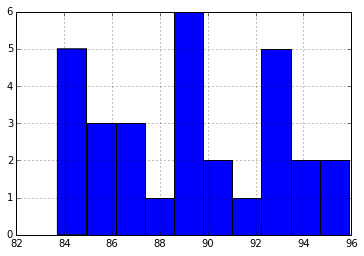

In [19]:
#Look at the distribution of Atlantas days:
df['Atlanta'].hist()

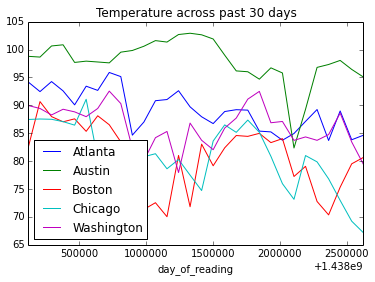

In [37]:
#Plot max temp across the 30 days for all cities to find trends:
for city in df.columns:
    df[city].plot(title="Temperature across past 30 days",legend=True)

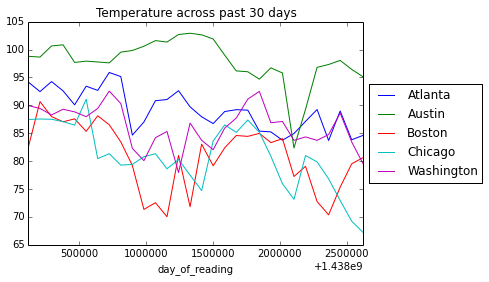

In [38]:
#To place the legend outside the plot:
for city in df.columns:
    df[city].plot(title="Temperature across past 30 days",legend=True).legend(loc='center left', bbox_to_anchor=(1, 0.5))